<a href="https://colab.research.google.com/github/mauricioaalmeida/DIO_TranferLearning/blob/main/Desafio_Redu%C3%A7%C3%A3o_Imagem_MAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto para redução de dimensionalidade em imagens

Este Projeto foi realizado por Maurício André de Almeida como trabalho no curso de Redução de Dimensionalidade em Imagens para Redes Neurais na DIO.ME

**Descrição do Desafio**

Seguindo o exemplo do algoritmo de binarização apresentado em nossa última aula, realize a implementação em Python para transformar uma imagem colorida para níveis de cinza (0 a 255) e para binarizada (0 e 255), preto e branco.  

Antes de rodar, carregue manualmente a imagem com o nome: Lenna.jpg

In [1]:
#!pip install tensorflow
#!pip install seaborn

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd


In [3]:
tf.__version__

'2.18.0'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [7]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# Define o modelo com menos layers para obter um resultado pior inicialmente:

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


c:\Users\mauri\Downloads\DIO\Projetos\Jypiter1\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Treina o modelo com apenas 1 Epoca para ter uma matriz de confusão mais relevante para os cálculos.

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=1,
            validation_data=(test_images, test_labels))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9197 - loss: 0.2551 - val_accuracy: 0.9833 - val_loss: 0.0507


In [10]:
y_true1=test_labels
predict_y=model.predict(test_images) 
y_pred1=np.argmax(predict_y,axis=1)

classes=[0,1,2,3,4,5,6,7,8,9]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Exibe a Matriz de Confusão e Realiza o Cálculo de Métricas de Avaliação de Aprendizado 

In [79]:
def avalia_metricas(y_true,y_pred,classes):
    matriz_confusao = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
    con_mat_norm = np.around(matriz_confusao.astype('float') / matriz_confusao.sum(axis=1)[:, np.newaxis], decimals=2)

    con_mat_df = pd.DataFrame(con_mat_norm,
                        index = classes, 
                        columns = classes)

    figure = plt.figure(figsize=(8, 8))
    sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print("Matriz de confusão:")
    print(matriz_confusao)
    FN = [0]*10
    FP = [0]*10
    VN = [0]*10
    VP = [0]*10
    total_elementos = np.sum(matriz_confusao)
    for i in range(matriz_confusao.shape[0]):
        for j in range(matriz_confusao.shape[1]):
            VN[i] = VN[i] + int(matriz_confusao[i][j])
            if i==j:
                VP[i] = int(matriz_confusao[i][j])
            else: 
                FN[i] = FN[i] + int(matriz_confusao[i][j])            
                FP[j] = FP[j] + int(matriz_confusao[i][j])
    for i in range(matriz_confusao.shape[0]):
        VN[i] =  int(np.sum(VP) - VP[i] )

    print("\n")
    especifi_v = [0]*10
    sensibil_v = [0]*10
    acuracia_v = [0]*10
    precisao_v = [0]*10
    fscore_v = [0]*10
    clas_str    = "Classe        : "
    vp_str      = "Verd.Posit.   : "
    vn_str      = "Verd.Negat.   : "
    fp_str      = "Falso Posit.  : "
    fn_str      = "Falso Negat.  : "
    espf_str    = "Especificidade: "
    sens_str    = "Sensibilidade : "
    acur_str    = "Acurácia      : "
    prec_str    = "Precisão      : "
    fscr_str    = "F-score       : "

    for i in classes:
        clas_str = clas_str + " %3d    | " % i
        vp_str = vp_str + " %6d | " % VP[i]
        vn_str = vn_str + " %6d | " % VN[i]
        fp_str = fp_str + " %6d | " % FP[i]
        fn_str = fn_str + " %6d | " % FN[i]
        
        especifi_v[i] = float( VN[i] / (VN[i] + FP[i]))
        sensibil_v[i] = float(VP[i] / (VP[i] + FN[i]))
        acuracia_v[i] = float((VP[i]+VN[i]) / total_elementos)
        precisao_v[i] = float(VP[i] / (VP[i] + FP[i]))
        fscore_v[i]   = float (2 * (precisao_v[i]) * (sensibil_v[i]) / float(precisao_v[i] + sensibil_v[i]))

        espf_str = espf_str + " %.4f | " % especifi_v[i]
        sens_str = sens_str + " %.4f | " % sensibil_v[i] 
        acur_str = acur_str + " %.4f | " % acuracia_v[i]
        prec_str = prec_str + " %.4f | " % precisao_v[i]
        fscr_str = fscr_str + " %.4f | " % fscore_v[i]
    
    print(clas_str)
    print("---------------------------------------------------------------------------------------------------------------------")
    print(vp_str)
    print(vn_str)
    print(fp_str)
    print("---------------------------------------------------------------------------------------------------------------------")
    print(espf_str)
    print(sens_str)
    print(acur_str)
    print(prec_str)
    print(fscr_str)
    print("\n")
    verdadeiro_positivo = sum(VP)
    # verdadeiro_negativo = sum(VN)
    verdadeiro_negativo = sum(VP)
    falso_positivo = sum(FP)
    falso_negativo = sum(FN)
    # sensibilidade = Recall
    sensibilidade = verdadeiro_positivo / (verdadeiro_positivo + falso_negativo)
    especificidade = verdadeiro_negativo / (falso_positivo + verdadeiro_negativo )      
    acuracia = verdadeiro_positivo / total_elementos
    precisao = verdadeiro_positivo / (verdadeiro_positivo + falso_positivo)
    fscore = 2 * (precisao) * (sensibilidade) / float(precisao + sensibilidade)
    print("Verdadeiro Positivo: ",verdadeiro_positivo, " = ",VP)
    print("Verdadeiro Negativo: ",verdadeiro_negativo, " = ",VN)
    print("Falso Positivo     : ",falso_positivo, " = ",FP)
    print("Falso Negativo     : ",falso_negativo, " = ",FN)
    print("Total de elementos : ",total_elementos)
    print("\n")
    print("Sensibilidade : %.8f - Média %.8f" % (sensibilidade , np.mean(sensibil_v)))
    print("Especificidade: %.8f - Média %.8f" % (especificidade, np.mean(especifi_v)))
    print("Acurácia      : %.8f - Média %.8f" % (acuracia, np.mean(acuracia_v)))
    print("Precisão      : %.8f - Média %.8f" % (precisao, np.mean(precisao_v)))
    print("F-score       : %.8f - Média %.8f" % (fscore, np.mean(fscore_v)))

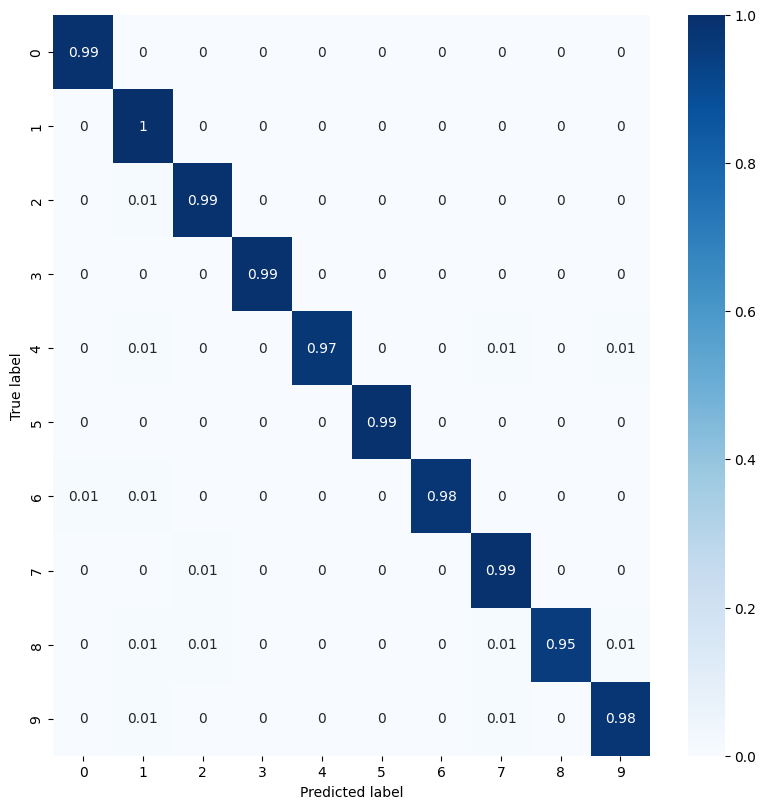

Matriz de confusão:
[[ 972    1    1    0    1    0    3    1    1    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   0    8 1019    0    0    0    0    5    0    0]
 [   0    0    1  997    0    5    0    5    2    0]
 [   0    5    1    0  956    0    1    5    0   14]
 [   1    0    0    2    0  884    3    0    0    2]
 [   6    6    0    0    1    2  942    0    1    0]
 [   0    3    6    2    0    1    0 1014    0    2]
 [   2   12   14    2    2    2    1    6  926    7]
 [   0    7    0    3    1    3    0    6    0  989]]


Classe        :    0    |    1    |    2    |    3    |    4    |    5    |    6    |    7    |    8    |    9    | 
---------------------------------------------------------------------------------------------------------------------
Verd.Posit.   :     972 |    1134 |    1019 |     997 |     956 |     884 |     942 |    1014 |     926 |     989 | 
Verd.Negat.   :    8861 |    8699 |    8814 |    8836 |    8877 |    8949 |    8891 |    8819 |

In [80]:
avalia_metricas(y_true1,y_pred1,classes)

---------------------------------------------------------------------------
#      REALIZA NOVO TREINAMENTO COM 5 Epocas e reavalia o modelo
---------------------------------------------------------------------------

Corrige o modelo

In [82]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


c:\Users\mauri\Downloads\DIO\Projetos\Jypiter1\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8927 - loss: 0.3399 - val_accuracy: 0.9809 - val_loss: 0.0626
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9845 - loss: 0.0507 - val_accuracy: 0.9858 - val_loss: 0.0417
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9888 - loss: 0.0347 - val_accuracy: 0.9912 - val_loss: 0.0256
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.9911 - val_loss: 0.0286
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9947 - loss: 0.0171 - val_accuracy: 0.9912 - val_loss: 0.0267


In [84]:
y_true2=test_labels
predict_y=model.predict(test_images) 
y_pred2=np.argmax(predict_y,axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


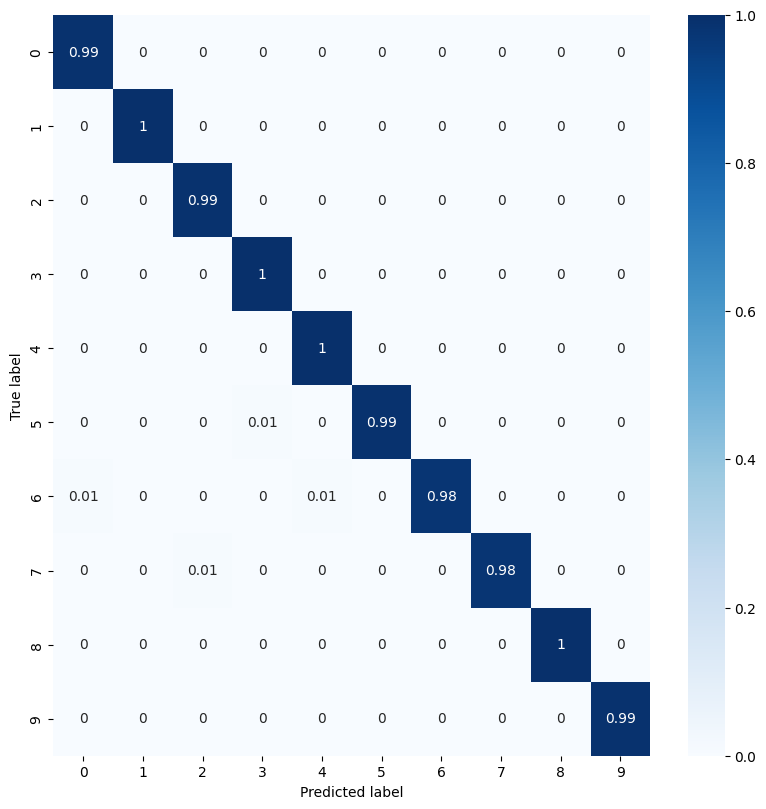

Matriz de confusão:
[[ 974    0    2    0    1    0    1    1    0    1]
 [   0 1130    1    0    0    0    4    0    0    0]
 [   0    0 1025    0    3    0    0    2    2    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    0    0  979    0    1    0    0    2]
 [   1    0    0    7    0  882    1    1    0    0]
 [   6    1    0    0    5    3  942    0    1    0]
 [   0    5    8    1    0    0    0 1010    0    4]
 [   1    0    1    1    0    0    0    0  970    1]
 [   0    0    0    0    5    3    0    3    4  994]]


Classe        :    0    |    1    |    2    |    3    |    4    |    5    |    6    |    7    |    8    |    9    | 
---------------------------------------------------------------------------------------------------------------------
Verd.Posit.   :     974 |    1130 |    1025 |    1006 |     979 |     882 |     942 |    1010 |     970 |     994 | 
Verd.Negat.   :    8938 |    8782 |    8887 |    8906 |    8933 |    9030 |    8970 |    8902 |

In [86]:
avalia_metricas(y_true2,y_pred2,classes)

=======================================================================================================